In [1]:
# Load the data
import pandas as pd

bike_data = pd.read_csv("train.csv")
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


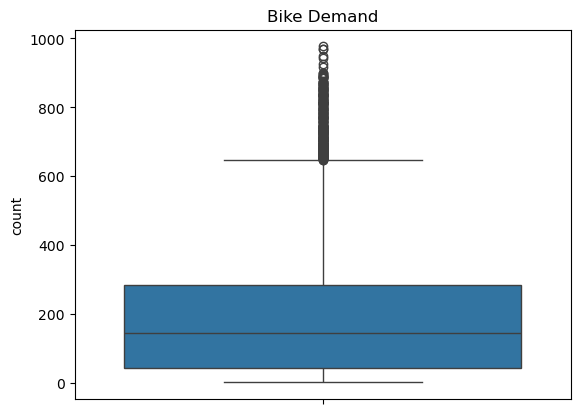

In [2]:
# Visualize the data

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(bike_data["count"])
plt.title("Bike Demand")
plt.show()

In [3]:
bike_data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [4]:
bike_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
bike_data["weather"].unique()

array([1, 2, 3, 4])

In [6]:
bike_data["season"].unique()

array([1, 2, 3, 4])

In [7]:
bike_data["datetime"] = pd.to_datetime(bike_data["datetime"])
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
bike_data["datetime"].dtype

dtype('<M8[ns]')

In [9]:
bike_data["hour"] = bike_data["datetime"].dt.hour
bike_data["day"] = bike_data["datetime"].dt.day
bike_data["month"] = bike_data["datetime"].dt.month
bike_data["year"] = bike_data["datetime"].dt.year

In [10]:
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,2011


In [11]:
bike_data.drop("datetime", axis=1, inplace=True)

In [12]:
bike_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,2011


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# spli the data in x and y
x = bike_data.drop("count", axis=1)
y = bike_data["count"]

# split the data in training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [14]:
# One hot encoding on categotical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(handle_unknown="ignore")

categorical_features = ["weather", "season"]

transformer = ColumnTransformer([
    ("one_hot", one_hot, categorical_features)
], remainder="passthrough")

x_train_encoded = transformer.fit_transform(x_train)
x_val_encode = transformer.transform(x_val)

In [15]:
x_train_encoded

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 6.000e+00, 7.000e+00,
        2.011e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 4.000e+00, 8.000e+00,
        2.012e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.100e+01, 7.000e+00,
        2.012e+03],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.800e+01, 1.200e+01,
        2.011e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.900e+01, 2.000e+00,
        2.011e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.000e+00, 5.000e+00,
        2.012e+03]])

In [16]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
model = DecisionTreeRegressor(max_depth=10,
                             min_samples_split=10,
                             min_samples_leaf=5)

# fit the model
model.fit(x_train_encoded, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10)

In [17]:
model.score(x_train_encoded, y_train)

0.9993765365114873

In [18]:
model.score(x_val_encode, y_val)

0.9985557652603316

In [19]:
y_pred = model.predict(x_val_encode)

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f"r2_score: {r2_score(y_val, y_pred)}")
print(f"mae: {mean_absolute_error(y_val, y_pred)}")
print(f"mse: {mean_squared_error(y_val, y_pred)}")

r2_score: 0.9985557652603316
mae: 3.7289966937132735
mse: 47.66976342629054


In [21]:
# gridearchcv

from sklearn.model_selection import GridSearchCV
grid = {
    "criterion": ["squared_error", "absolute_error"],
    "splitter":["best", "random"],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 2]
    
}


gs_model = GridSearchCV(estimator = model, 
             param_grid=grid, 
             cv=5, 
             verbose=2, 
             refit=True)

In [22]:
gs_model.fit(x_train_encoded, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, min_sampl

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=10, min_samples_leaf=5,
                                             min_samples_split=10),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 10],
                         'splitter': ['best', 'random']},
             verbose=2)

In [23]:
gs_model.best_params_

{'criterion': 'absolute_error',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [24]:
gs_model.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', min_samples_leaf=2)

In [25]:
gs_model.score(x_train_encoded, y_train)

0.9998890420706411

In [26]:
gs_model.score(x_val_encode, y_val)

0.998945469572694

In [27]:
y_pred = gs_model.predict(x_val_encode)
print(f"r2_score: {r2_score(y_val, y_pred)}")
print(f"mae: {mean_absolute_error(y_val, y_pred)}")
print(f"mse: {mean_squared_error(y_val, y_pred)}")

r2_score: 0.998945469572694
mae: 2.986914600550964
mse: 34.80681818181818


In [28]:
# Save the model

import pickle
pickle.dump(gs_model, open("bike_demand_model.pkl", "wb"))

# Use pipeline

In [29]:
# Getting data ready
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Modelling
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Setup random seed
import numpy as np

np.random.seed(42)

# Load the data and drop missing label rows
data = pd.read_csv("train.csv")
data.dropna(subset=["count"], inplace=True)

# Extract imp values from datetime column
data["datetime"] = pd.to_datetime(data["datetime"])
data["hour"] = data["datetime"].dt.hour
data["day"] = data["datetime"].dt.day
data["month"] = data["datetime"].dt.month
data["year"] = data["datetime"].dt.year

# Columns to drop 
drop_features = ["datetime"]

# Categorical features
categorical_features = ["weather", "season"]
categorical_transformer = Pipeline(steps=[
    ("one_hot", OneHotEncoder(handle_unknown="ignore"))
])

# setpup preprocessing steps (drop column and one hot encoding)
preprocessor = ColumnTransformer([
    ("drop", "drop", drop_features),
    ("cat", categorical_transformer, categorical_features)
])

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor())
])

# Split the data in x and y
x = data.drop("count", axis=1)
y = data["count"]

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('drop', 'drop', ['datetime']),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['weather', 'season'])])),
                ('model', DecisionTreeRegressor())])

In [30]:
model.score(x_train, y_train)

0.07755691059055037

In [31]:
model.score(x_test, y_test)

0.08797689797854424

In [32]:
# GridSearchCV

grid2 = {
    'model__criterion' : ["absolute_error"],
    'model__max_depth' : [None, 5],
    'model__min_samples_split' : [2, 10],
    'model__min_samples_leaf' : [2],
    'model__splitter' : ["best"]
}

from sklearn.model_selection import GridSearchCV

gs_model = GridSearchCV(model, grid2, cv=5, verbose=2, refit=True)
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END model__criterion=absolute_error, model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2, model__splitter=best; total time=   0.4s
[CV] END model__criterion=absolute_error, model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2, model__splitter=best; total time=   0.4s
[CV] END model__criterion=absolute_error, model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2, model__splitter=best; total time=   0.4s
[CV] END model__criterion=absolute_error, model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2, model__splitter=best; total time=   0.4s
[CV] END model__criterion=absolute_error, model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2, model__splitter=best; total time=   0.4s
[CV] END model__criterion=absolute_error, model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=10, model__splitte

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('drop',
                                                                         'drop',
                                                                         ['datetime']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('one_hot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['weather',
                                                                          'season'])])),
                                       ('model', DecisionTreeRegressor())]),
             param_grid={'model__criterion': ['absolute_error'],
                         'model__max_depth': [None, 5],
                         'model__min_samples_leaf': [2],
                         'model__min_samples_split': [2, 10],
                         'model__splitter': ['best']},
             verbose=2)

In [33]:
gs_model.score(x_train, y_train)

0.033987716341842056

In [34]:
gs_model.score(x_test, y_test)

0.04457425788618197

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred = gs_model.predict(x_test)
print(f"r2_score: {r2_score(y_test, y_pred)}")
print(f"mae: {mean_absolute_error(y_test, y_pred)}")
print(f"mse: {mean_squared_error(y_test, y_pred)}")

r2_score: 0.04457425788618197
mae: 129.25367309458218
mse: 31535.67619375574
